<a href="https://colab.research.google.com/github/NamNT36/Artifical-Intelligence/blob/main/AI_W11_FRI_14_04_CNN_FASHION_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
y_test.shape

(10000,)

Vật này là:  9


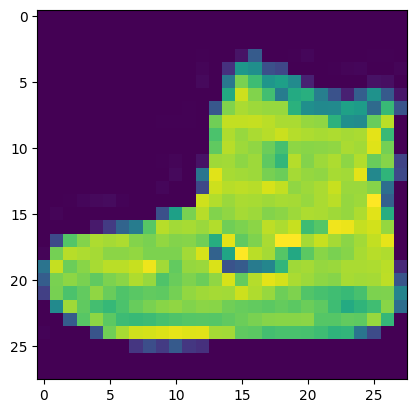

In [5]:
digit = x_train[0]
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show
print('Vật này là: ', y_train[0])

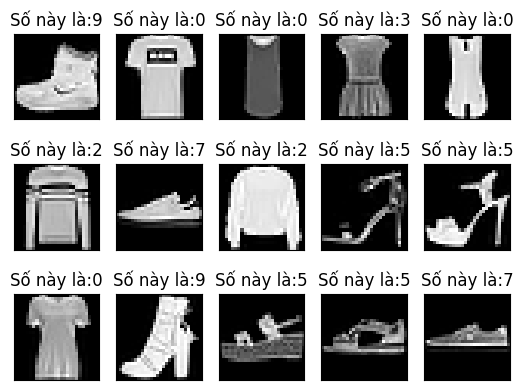

In [6]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout
  plt.imshow(x_train[i],cmap='gray',
             interpolation='none')
  plt.title('Số này là:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [7]:
from numpy.ma.core import reshape
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
x_train = x_train.astype('float32')
x_train = x_train/255

In [9]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10) #chỉ nên chạy 1 lần(nếu chạy tiếp sẽ tăng thêm 10)
y_test = to_categorical(y_test, 10)

print(y_train.shape)

(60000, 10)


In [10]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

batch_size = 64
epochs = 20     #số lần học
classes = 10    #phân loại

In [11]:
#VGG
model = Sequential()

#Lần tích chập 1
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear',
                 input_shape = (28,28,1), padding = 'same'))   #32: số lần tích chập
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

#Lần tích chập 2
model.add(Conv2D(64,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

#Lần tích chập 3
model.add(Conv2D(128,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

In [12]:
model.add(Flatten())  #Flatten: làm phẳng thành 1 vecto
model.add(Dense(128,activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [13]:
from keras.losses import categorical_crossentropy
model.compile(loss = 'categorical_crossentropy',optimizer = Adam(),metrics = ['accuracy'])
train = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)  #verbose=1 -> hiển thị quá trình học ra(=0 thì không hiển thị)

test_loss, test_acc = model.evaluate(x_test,y_test)
print('Độ mất mát: ',test_loss)
print('Độ chính xác: ',test_acc)

Epoch 1/20
938/938 [==============================] - 15s 4ms/step - loss: 0.4403 - accuracy: 0.8385
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.2714 - accuracy: 0.9000
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2266 - accuracy: 0.9169
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1980 - accuracy: 0.9269
Epoch 5/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1715 - accuracy: 0.9361
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1500 - accuracy: 0.9437
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1307 - accuracy: 0.9511
Epoch 8/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1101 - accuracy: 0.9587
Epoch 9/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0967 - accuracy: 0.9637
Epoch 10/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0821 - accuracy: 0.968

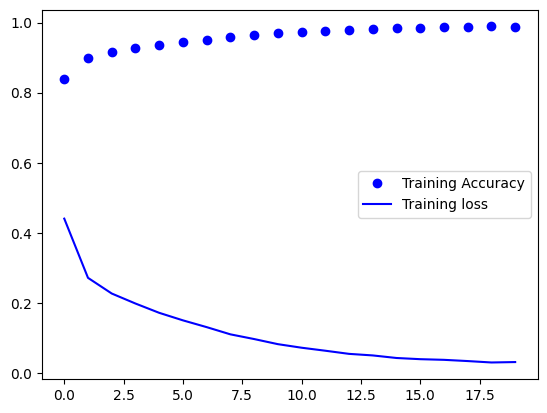

In [14]:
model.save('model1.h5')
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label = 'Training Accuracy')
plt.plot(epochs,loss,'b',label = 'Training loss')
plt.legend()
plt.show()